###The project goal is to Predict whether a student passes (1) or fails (0) based on factors like study hours, attendance, motivation, etc.

###Step 1: Import the libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix



###Step 2: Load the dataset

In [21]:
df=pd.read_csv('/content/StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [23]:
print(df.shape) #number of rows and columns respectively

(6607, 20)


In [24]:
print(df.isnull().sum()) #find out the number of missing values in the columns

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [25]:
# Fill categorical columns with mode
categorical_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


###Step 3: Create a binary target variable

In [29]:
#A student passes if their score is >=65
df['passed'] = (df['Exam_Score']>=65).astype(int)

#check how many passed and failed
print(df['passed'].value_counts())

#Look at the sample rows again
df[['Exam_Score', 'passed']].head(10)

passed
1    5155
0    1452
Name: count, dtype: int64


,Exam_Score,passed
0,67,1
1,61,0
2,74,1
3,71,1
4,70,1
5,71,1
6,67,1
7,66,1
8,69,1
9,72,1


###Step 4: Prepare the features(inputs)

In [30]:
#Drop the columns we dont want to use as features
X = df.drop(columns=['Exam_Score', 'passed'])
y = df['passed']

# Convert categorical (text) columns into numbers
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)

Shape after encoding: (6607, 27)


###Step 5: Split into training and testing sets


In [31]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify=y makes sure both sets have the same proportion of pass/fail students.

print("Training samples:", X_train.shape[0])
print("Testing samples:", x_test.shape[0])

Training samples: 5285
Testing samples: 1322


###Step 6: Train the Logistic Regression model

In [32]:
# Build a pipeline: scale → train model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

# Fit (train) the model
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=1000))])

###Step 7: Make predictions and evaluate

Accuracy: 0.984
ROC AUC: 0.998

Confusion Matrix:
 [[ 274   17]
 [   4 1027]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       291
           1       0.98      1.00      0.99      1031

    accuracy                           0.98      1322
   macro avg       0.98      0.97      0.98      1322
weighted avg       0.98      0.98      0.98      1322



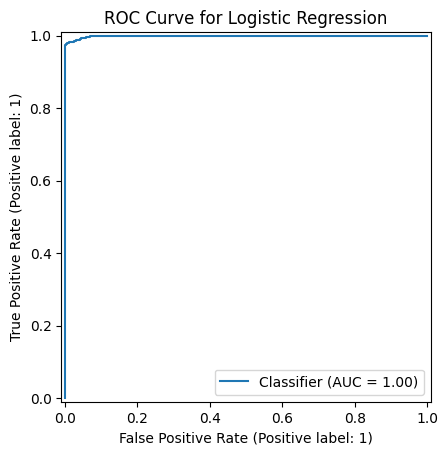

In [33]:
# Predict labels on the test set
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]  # probabilities for class 1

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(accuracy, 3))
print("ROC AUC:", round(roc_auc, 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve for Logistic Regression")
plt.show()

###Confusion Matrix

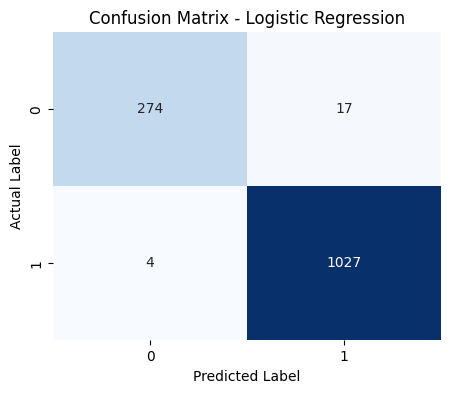

In [34]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
